In [15]:
!tar -xzvf aclImdb_v1.tar.gz

Streaming output truncated to the last 5000 lines.
aclImdb/train/unsup/44983_0.txt
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclImdb/train/unsup/4

In [16]:
import os

# List the contents of the extracted directory
print("Contents of aclImdb:", os.listdir('/content/aclImdb'))


Contents of aclImdb: ['imdb.vocab', 'train', 'test', 'README', 'imdbEr.txt']


Data exploration

In [17]:
# Read and print the first few positive and negative reviews
with open('/content/aclImdb/train/pos/0_9.txt', 'r', encoding='utf-8') as file:
    print("Sample Positive Review:")
    print(file.read())

with open('/content/aclImdb/train/neg/0_3.txt', 'r', encoding='utf-8') as file:
    print("\nSample Negative Review:")
    print(file.read())


Sample Positive Review:
Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High's satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I'm here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn't!

Sample Negative Review:
Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orche

In [18]:
import os

# Count positive and negative reviews in the training set
pos_reviews = len(os.listdir('/content/aclImdb/train/pos'))
neg_reviews = len(os.listdir('/content/aclImdb/train/neg'))

print("Number of positive reviews in training set:", pos_reviews)
print("Number of negative reviews in training set:", neg_reviews)

Number of positive reviews in training set: 12500
Number of negative reviews in training set: 12500


In [20]:
import os
import numpy as np

# Function to load reviews and label them
def load_reviews(data_path):
    texts = []
    labels = []

    # Load positive reviews and assign label 1
    pos_path = os.path.join(data_path, 'pos')
    for filename in os.listdir(pos_path):
        if filename.endswith('.txt'):
            with open(os.path.join(pos_path, filename), 'r', encoding='utf-8') as file:
                texts.append(file.read())
                labels.append(1)

    # Load negative reviews and assign label 0
    neg_path = os.path.join(data_path, 'neg')
    for filename in os.listdir(neg_path):
        if filename.endswith('.txt'):
            with open(os.path.join(neg_path, filename), 'r', encoding='utf-8') as file:
                texts.append(file.read())
                labels.append(0)

    return np.array(texts), np.array(labels)


In [21]:
import numpy as np

# Load labels and check distribution
_, train_labels = load_reviews('/content/aclImdb/train')
unique, counts = np.unique(train_labels, return_counts=True)
print("Label distribution:", dict(zip(unique, counts)))


Label distribution: {0: 12500, 1: 12500}


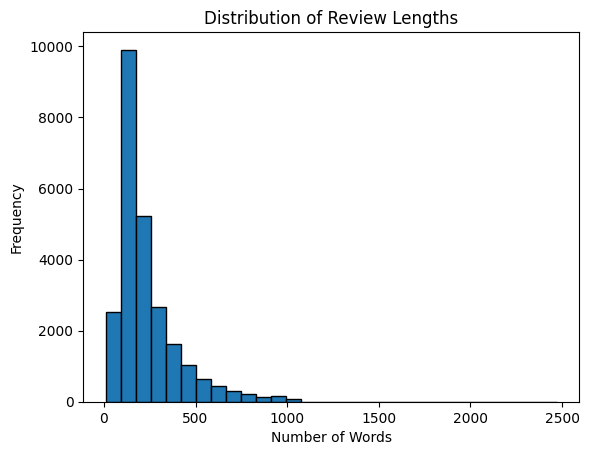

In [22]:
# Get the length of reviews
review_lengths = []

train_texts, _ = load_reviews('/content/aclImdb/train')
for review in train_texts:
    review_lengths.append(len(review.split()))

# Plot a histogram of review lengths
import matplotlib.pyplot as plt

plt.hist(review_lengths, bins=30, edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

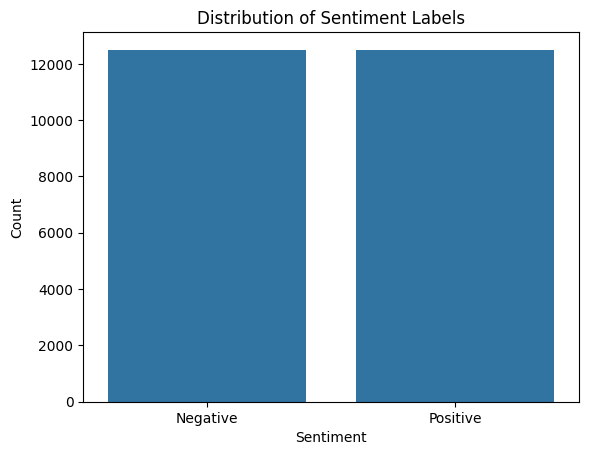

In [23]:
import seaborn as sns

sns.countplot(x=train_labels)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.show()


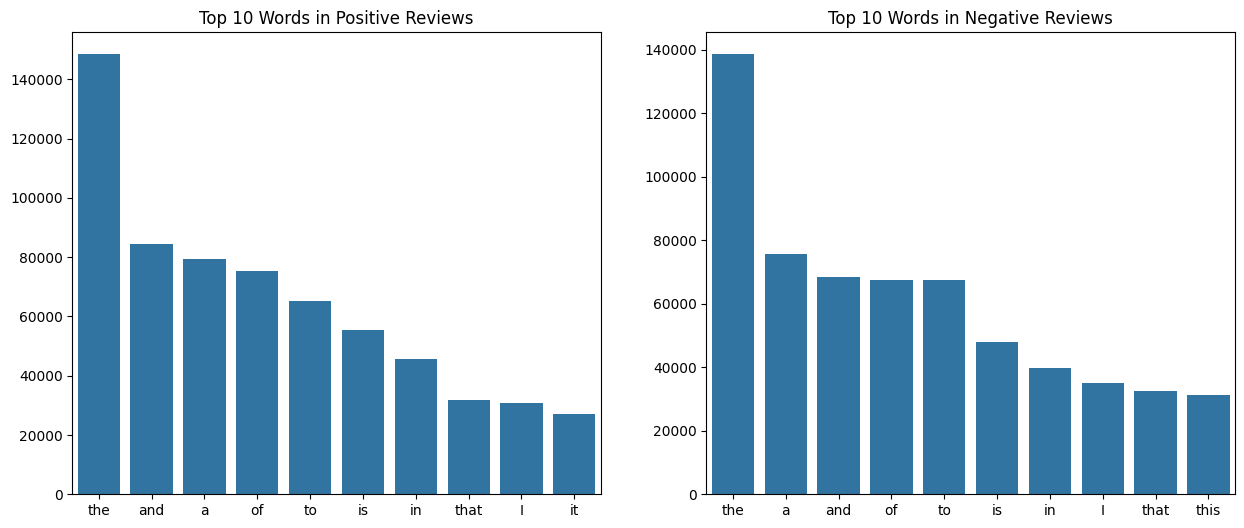

In [24]:
from collections import Counter

positive_words = ' '.join([text for i, text in enumerate(train_texts) if train_labels[i] == 1])
negative_words = ' '.join([text for i, text in enumerate(train_texts) if train_labels[i] == 0])

positive_word_count = Counter(positive_words.split())
negative_word_count = Counter(negative_words.split())

# Plot top 10 words in positive and negative reviews
positive_common = positive_word_count.most_common(10)
negative_common = negative_word_count.most_common(10)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(x=[word[0] for word in positive_common], y=[word[1] for word in positive_common], ax=axes[0])
axes[0].set_title('Top 10 Words in Positive Reviews')
sns.barplot(x=[word[0] for word in negative_common], y=[word[1] for word in negative_common], ax=axes[1])
axes[1].set_title('Top 10 Words in Negative Reviews')
plt.show()


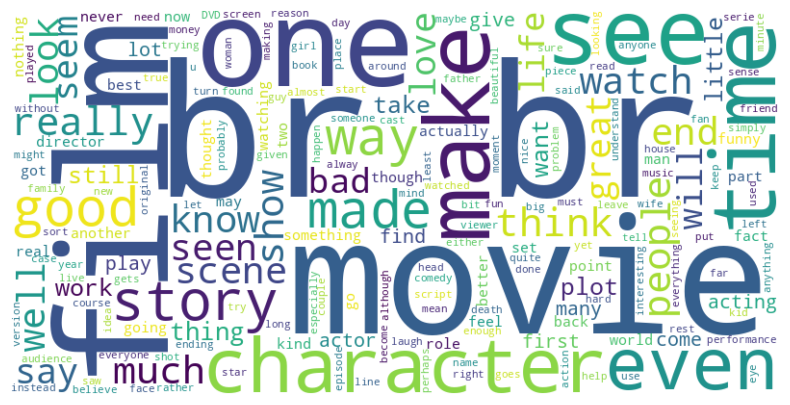

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(train_texts))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Load the Data and Label it**

I'll create a function to load the positive and negative reviews and assign labels (1 for positive and 0 for negative).

In [25]:
import os
import numpy as np

# Function to load reviews and label them
def load_reviews(data_path):
    texts = []
    labels = []

    # Load positive reviews and assign label 1
    pos_path = os.path.join(data_path, 'pos')
    for filename in os.listdir(pos_path):
        if filename.endswith('.txt'):
            with open(os.path.join(pos_path, filename), 'r', encoding='utf-8') as file:
                texts.append(file.read())
                labels.append(1)

    # Load negative reviews and assign label 0
    neg_path = os.path.join(data_path, 'neg')
    for filename in os.listdir(neg_path):
        if filename.endswith('.txt'):
            with open(os.path.join(neg_path, filename), 'r', encoding='utf-8') as file:
                texts.append(file.read())
                labels.append(0)

    return np.array(texts), np.array(labels)

# Load training data
train_texts, train_labels = load_reviews('/content/aclImdb/train')
print("Number of training samples:", len(train_texts))


Number of training samples: 25000


**Preprocess the Text Data**

We need to preprocess the text data to make it suitable for training a logistic regression model. This includes tokenizing the text and converting it to a numerical format.

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert the text data to a bag-of-words representation
vectorizer = CountVectorizer(max_features=10000, stop_words='english')
X_train = vectorizer.fit_transform(train_texts)

print("Shape of training data:", X_train.shape)


Shape of training data: (25000, 10000)


**Train a Logistic Regression Model**

Now that the data is preprocessed, we can train a logistic regression model on it.

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, train_labels, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_split, y_train_split)

# Evaluate the model on the validation set
y_pred = model.predict(X_val_split)
accuracy = accuracy_score(y_val_split, y_pred)
print("Validation accuracy:", accuracy)


Validation accuracy: 0.8728


**Test the Model**

You can also test the model with unseen data

In [28]:
# Load test data
test_texts, test_labels = load_reviews('/content/aclImdb/test')
X_test = vectorizer.transform(test_texts)

# Predict and evaluate on the test set
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(test_labels, y_test_pred)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.8488


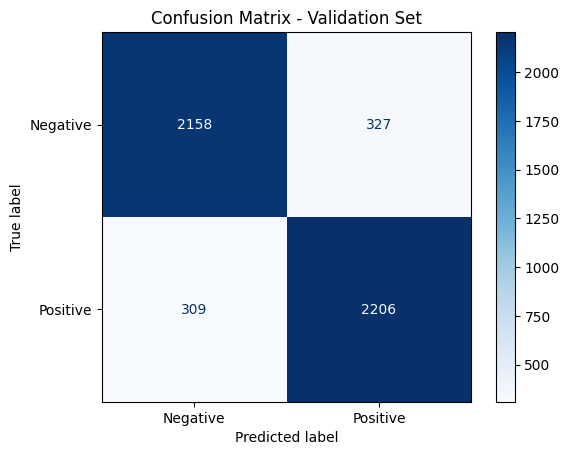

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_val_split, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Validation Set')
plt.show()


In [30]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, train_labels, cv=5, scoring='accuracy')
print(f"Cross-validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")


Cross-validation Accuracy: 0.87 ± 0.01


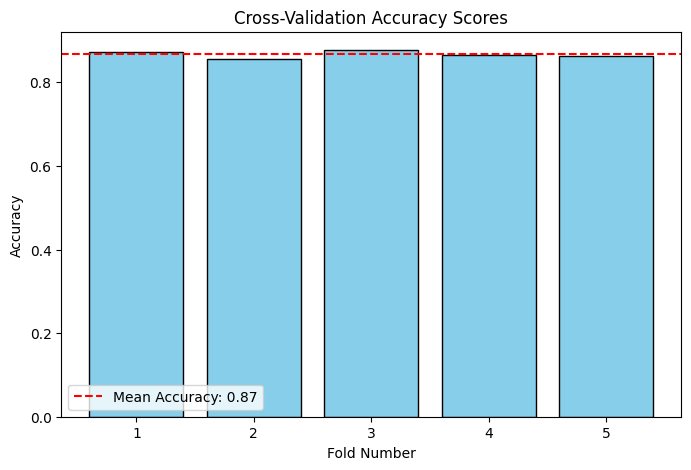

In [31]:
import matplotlib.pyplot as plt

# Plot cross-validation scores
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(cv_scores) + 1), cv_scores, color='skyblue', edgecolor='black')
plt.axhline(y=cv_scores.mean(), color='r', linestyle='--', label=f'Mean Accuracy: {cv_scores.mean():.2f}')
plt.title('Cross-Validation Accuracy Scores')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(cv_scores) + 1))
plt.legend()
plt.show()


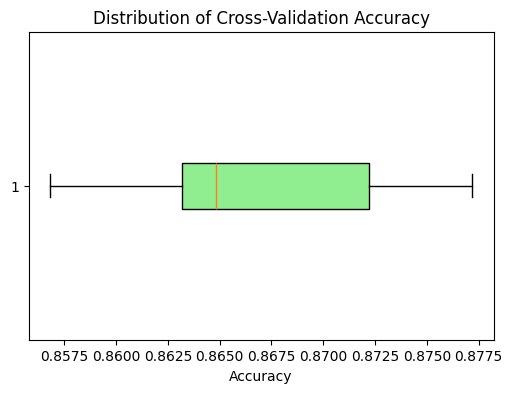

In [32]:
plt.figure(figsize=(6, 4))
plt.boxplot(cv_scores, vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Distribution of Cross-Validation Accuracy')
plt.xlabel('Accuracy')
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


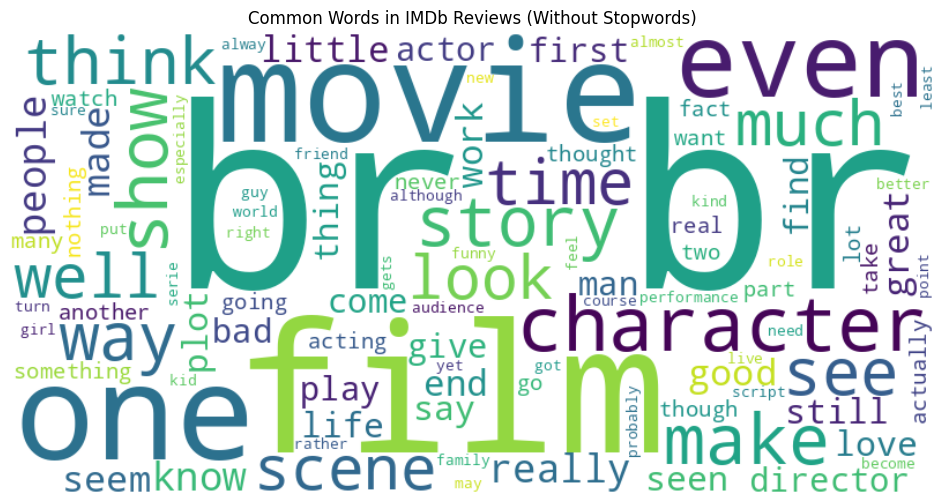

In [34]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import pandas as pd
from nltk.corpus import stopwords

# Ensure you download stopwords if running for the first time
import nltk
nltk.download('stopwords')

# Load English stopwords
stop_words = set(stopwords.words('english'))

# Preprocess the text by removing stopwords
def preprocess_text_for_visualization(texts):
    processed_text = []
    for text in texts:
        words = [word for word in text.split() if word.lower() not in stop_words]
        processed_text.extend(words)
    return processed_text

# Apply preprocessing to all training texts
preprocessed_words = preprocess_text_for_visualization(train_texts)

# Combine preprocessed words into a single string for word cloud
all_text = ' '.join(preprocessed_words)

# Generate a word cloud without stopwords
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(all_text)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in IMDb Reviews (Without Stopwords)')
plt.show()

# Tokenize and count word frequencies for bar chart
word_counts = Counter(preprocessed_words)

# Create a DataFrame for the top 20 words
common_words = pd.DataFrame(word_counts.most_common(20), columns=['Word', 'Frequency'])

# Plot a bar cha


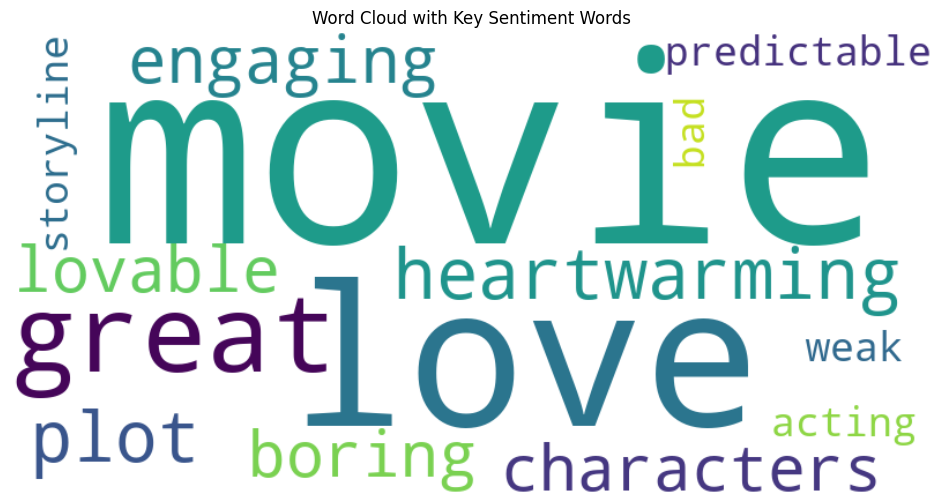

In [37]:
from wordcloud import STOPWORDS, WordCloud
import matplotlib.pyplot as plt
import numpy as np

# Sample positive and negative text data
positive_texts = "I love this movie, it was great and heartwarming. The plot was engaging and the characters were lovable."
negative_texts = "This movie was boring and predictable. The acting was bad and the storyline was weak."

# Combine all positive and negative reviews into single strings
combined_texts = positive_texts + ' ' + negative_texts

# Create a word cloud with stop words removed
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS,
                      colormap='viridis').generate(combined_texts)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud with Key Sentiment Words')
plt.axis('off')
plt.show()

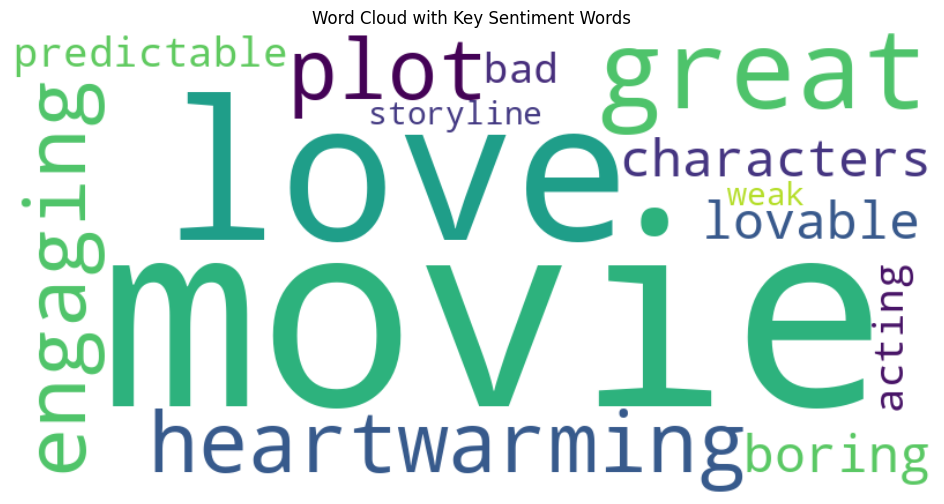

In [38]:
from wordcloud import STOPWORDS, WordCloud
import matplotlib.pyplot as plt
import numpy as np

# Sample positive and negative text data
positive_texts = "I love this movie, it was great and heartwarming. The plot was engaging and the characters were lovable."
negative_texts = "This movie was boring and predictable. The acting was bad and the storyline was weak."

# Combine all positive and negative reviews into single strings
combined_texts = positive_texts + ' ' + negative_texts

# Create a word cloud with stop words removed and increased max words
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS,
                      colormap='viridis', max_words=200).generate(combined_texts)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud with Key Sentiment Words')
plt.axis('off')
plt.show()

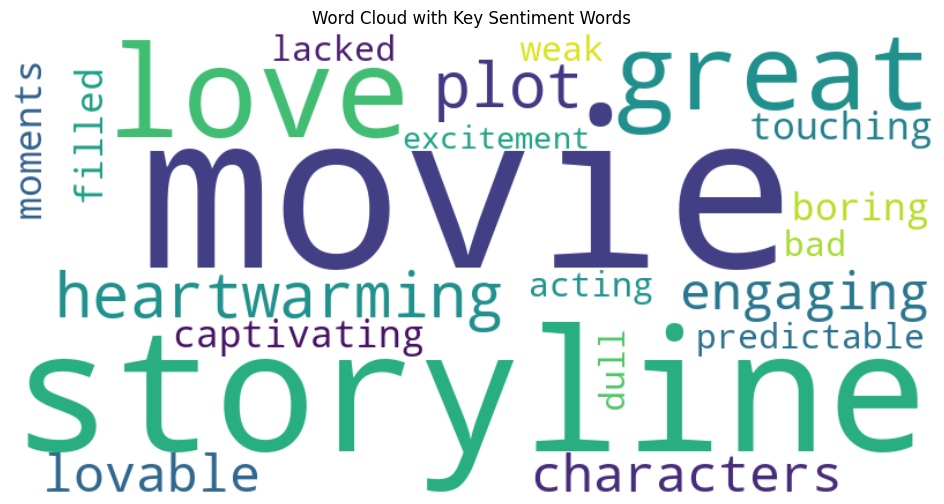

In [39]:
from wordcloud import STOPWORDS, WordCloud
import matplotlib.pyplot as plt
import numpy as np

# Sample positive and negative text data
positive_texts = "I love this movie, it was great and heartwarming. The plot was engaging and the characters were lovable. The storyline was captivating and filled with touching moments."
negative_texts = "This movie was boring and predictable. The acting was bad and the storyline was weak. It was dull and lacked excitement."

# Combine all positive and negative reviews into single strings
combined_texts = positive_texts + ' ' + negative_texts

# Create a word cloud with stop words removed and increased max words
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS,
                      colormap='viridis', max_words=500).generate(combined_texts)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud with Key Sentiment Words')
plt.axis('off')
plt.show()


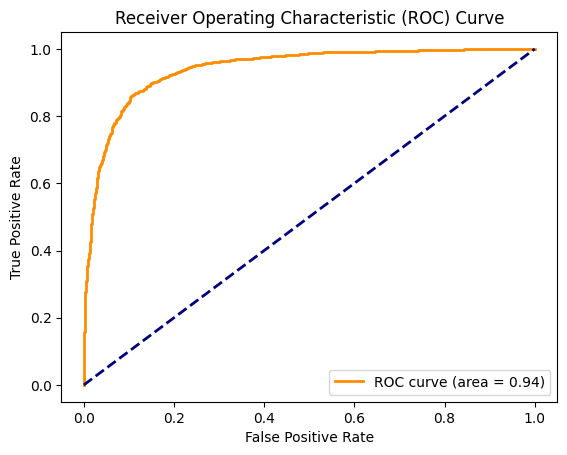

In [42]:
# Assuming X_train is the preprocessed feature matrix and train_labels is the label vector
X = X_train
y = train_labels

# Now, you can split the data for training and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Continue with predictions and ROC curve plotting
y_val_pred = model.predict(X_val)

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_val, model.predict_proba(X_val)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
